<a href="https://colab.research.google.com/github/sravs99-44/News_Classification/blob/main/newsClassification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/newsCorpora.csv", error_bad_lines=False)

In [3]:
print(len(data))

415089


In [105]:
data.to_csv('/content/drive/MyDrive/newsCorpora.csv', index=False)

df_csv = pd.read_csv('/content/drive/MyDrive/newsCorpora.csv', names=['a', 'b', 'c','d'])
training_data=[]
target_list=['b','t','e','m']
for i in range(205399):
    s=str(df_csv['a'][i])+str(df_csv['b'][i])+str(df_csv['c'][i])+str(df_csv['d'][i])
    l=s.split("\t")
    training_data.append({'data' : str(l[1]) , 'flag' : target_list.index(str(l[4]))})
training_data[0]

{'data': 'Fed official says weak data caused by weather should not slow taper',
 'flag': 0}

In [ ]:
for i in range(len(training_data)):
  

In [5]:
training_data = pd.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')

training_data.head()

,data,flag
0,Fed official says weak data caused by weather ...,0
1,Fed's Charles Plosser sees high bar for change...,0
2,US open: Stocks fall after Fed official hints ...,0
3,Fed risks falling 'behind the curve' Charles P...,0
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,0


Stemming

In [17]:
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
nltk.download('punkt')
for i in range(len(training_data)):
    text_tokens = word_tokenize(training_data.data[i])
    s=""
    for w in text_tokens:
        s+=ps.stem(w)
        s+="  "
    training_data.data[i]=s.strip()
training_data.data[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


'fed  offici  say  weak  data  caus  by  weather  should  not  slow  taper'

Count **Vectorization**

In [18]:
from sklearn.feature_extraction.text import CountVectorizer


#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)

**TF-IDF**

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

SVM Classifier

[[13161   576   179   107]
 [  611 12540   156    51]
 [  206   136 18277    54]
 [  174    56   105  4961]]
accuracy_score: 0.953047711781889
precision_score: 0.953047711781889
recall_score: 0.953047711781889
f1_score: 0.953047711781889


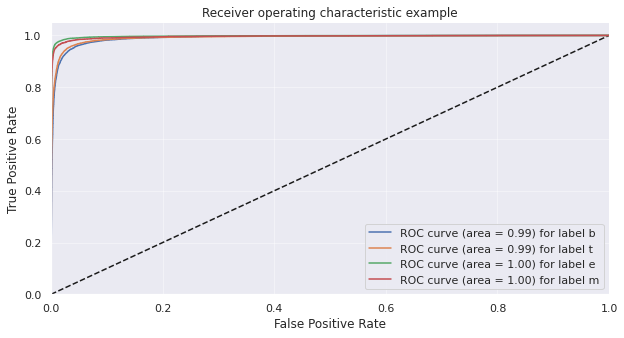

In [33]:
from sklearn.model_selection import train_test_split
#SVM classification
from sklearn import svm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
y_test2=y_test
y_test3=y_test
clf_svm = svm.LinearSVC()
clf_svm.fit(X_train,y_train)
predicted = clf_svm.predict(X_test)
  

confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)
print("accuracy_score:",accuracy_score(y_test, predicted))
print("precision_score:",precision_score(y_test, predicted, average='micro'))
print("recall_score:",recall_score(y_test,predicted,average="micro"))
print("f1_score:",f1_score(y_test,predicted,average="micro"))
#....for plotting roc curve.......
y_score = clf_svm.fit(X_train, y_train).decision_function(X_test)

#y_test = label_binarize(y_test, classes=[0, 1, 2,3])
fpr = dict()
tpr = dict()
roc_auc = dict()
target_list=['b','t','e','m']

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
n_classes=4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
figsize=(10,5)
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], target_list[i]))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()




Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test2,y_pred)
print(confusion_mat)
print("accuracy_score:",accuracy_score(y_test2, y_pred))
print("precision_score:",precision_score(y_test2, y_pred, average='micro'))
print("recall_score:",recall_score(y_test2,y_pred,average="micro"))
print("f1_score:",f1_score(y_test2,y_pred,average="micro"))




[[12302   790   633   298]
 [  929 11697   577   155]
 [  573   376 17520   204]
 [  355   178   346  4417]]
accuracy_score: 0.8945666991236612
precision_score: 0.8945666991236612
recall_score: 0.8945666991236612
f1_score: 0.8945666991236612


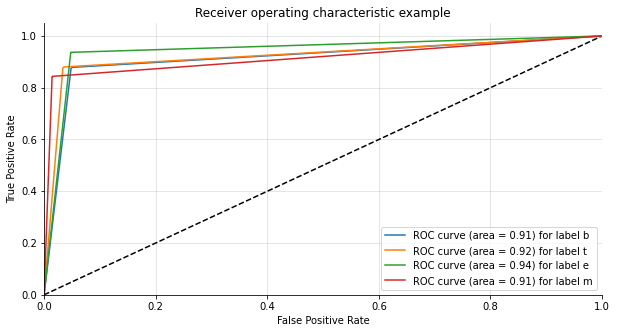

In [30]:
#....for plotting roc curve.......
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

#y_test = label_binarize(y_test, classes=[0, 1, 2,3])
fpr = dict()
tpr = dict()
roc_auc = dict()
target_list=['b','t','e','m']

y_test_dummies = pd.get_dummies(y_test2, drop_first=False).values
n_classes=4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
figsize=(10,5)
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], target_list[i]))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

kNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_mat)
print("accuracy_score:",accuracy_score(y_test2, y_pred))
print("precision_score:",precision_score(y_test2, y_pred, average='micro'))
print("recall_score:",recall_score(y_test2,y_pred,average="micro"))
print("f1_score:",f1_score(y_test2,y_pred,average="micro"))

[[12302   790   633   298]
 [  929 11697   577   155]
 [  573   376 17520   204]
 [  355   178   346  4417]]
accuracy_score: 0.9461148977604674
precision_score: 0.9461148977604674
recall_score: 0.9461148977604674
f1_score: 0.9461148977604674


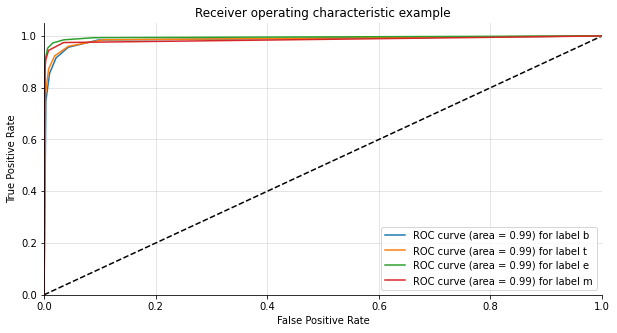

In [33]:
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#-----for plotting ROC curve-----
#y_test = label_binarize(y_test, classes=[0, 1, 2,3])
fpr = dict()
tpr = dict()
roc_auc = dict()
target_list=['b','t','e','m']

y_test_dummies = pd.get_dummies(y_test2, drop_first=False).values
n_classes=4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
figsize=(10,5)
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], target_list[i]))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

LSTM

In [21]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_data.data)
len(tokenizer.word_index)

31478

In [23]:
all_encoded_texts = tokenizer.texts_to_sequences(training_data.data)
all_encoded_texts = np.array(all_encoded_texts)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [24]:
all_encoded_texts = sequence.pad_sequences(all_encoded_texts, maxlen=50)
all_encoded_texts.shape

(205399, 50)

In [25]:
all_labels = training_data.flag[:, np.newaxis]
one_hot_encoder = OneHotEncoder(sparse=False)
all_labels = one_hot_encoder.fit_transform(all_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [61]:
X_train, X_test, y_train, y_test = train_test_split(all_encoded_texts, all_labels, test_size=0.2, random_state=42,stratify=all_labels)

In [52]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(all_encoded_texts, all_labels, test_size=0.2, random_state=42)

In [68]:
y_test4=[]
y_test3=y_test2
for i in range(len(y_test2)):
  for j in range(4):
    if(y_test3[i][j]==1):
      y_test4.append(j)

len(y_test4)
y_test4=np.array(y_test4)
y_test4

array([1, 2, 1, ..., 1, 2, 0])

In [27]:
model = Sequential()
model.add(Embedding(input_dim=100000, output_dim=32, input_length=50))
model.add(LSTM(100))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [63]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
2568/2568 [==============================] - 79s 30ms/step - loss: 0.4636 - accuracy: 0.8172 - val_loss: 0.1509 - val_accuracy: 0.9488
Epoch 2/5
2568/2568 [==============================] - 77s 30ms/step - loss: 0.1195 - accuracy: 0.9594 - val_loss: 0.1516 - val_accuracy: 0.9482
Epoch 3/5
2568/2568 [==============================] - 77s 30ms/step - loss: 0.0940 - accuracy: 0.9676 - val_loss: 0.1516 - val_accuracy: 0.9500
Epoch 4/5
2568/2568 [==============================] - 77s 30ms/step - loss: 0.0791 - accuracy: 0.9727 - val_loss: 0.1547 - val_accuracy: 0.9493
Epoch 5/5
2568/2568 [==============================] - 76s 30ms/step - loss: 0.0667 - accuracy: 0.9768 - val_loss: 0.1622 - val_accuracy: 0.9493


In [28]:
history = model.fit(X_train2, y_train2, epochs=5, batch_size=64, validation_data=(X_test2, y_test2))

Epoch 1/5
2568/2568 [==============================] - 110s 42ms/step - loss: 0.4519 - accuracy: 0.8175 - val_loss: 0.1523 - val_accuracy: 0.9494
Epoch 2/5
2568/2568 [==============================] - 108s 42ms/step - loss: 0.1197 - accuracy: 0.9594 - val_loss: 0.1488 - val_accuracy: 0.9505
Epoch 3/5
2568/2568 [==============================] - 109s 42ms/step - loss: 0.0939 - accuracy: 0.9674 - val_loss: 0.1481 - val_accuracy: 0.9507
Epoch 4/5
2568/2568 [==============================] - 112s 43ms/step - loss: 0.0769 - accuracy: 0.9724 - val_loss: 0.1671 - val_accuracy: 0.9491
Epoch 5/5
2568/2568 [==============================] - 112s 44ms/step - loss: 0.0682 - accuracy: 0.9758 - val_loss: 0.1594 - val_accuracy: 0.9504


In [87]:
yhat_probs = model.predict(X_test2, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test2, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]
import numpy as np
y_test=np.argmax(y_test2, axis=1)

 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy_score: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average="micro")
print('Precision_score: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,average = "micro")
print('Recall_score: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average ="micro")
print('F1 score: %f' % f1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy_score: 0.950365
Precision_score: 0.950365
Recall_score: 0.950365
F1 score: 0.950365


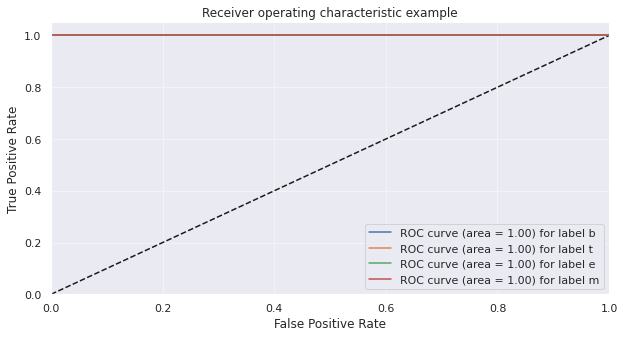

In [99]:
#----- for plotting ROC cure------
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
y_score=yhat_classes
y_score=label_binarize(y_test2, classes=[0, 1, 2,3])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()


y_test_dummies = pd.get_dummies(y_test4, drop_first=False).values
n_classes=4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

figsize=(10,5)
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], target_list[i]))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

